### import data

In [17]:
# Importing necessary libraries
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [18]:
import os
# Folder path containing CSV files
folder_path = r"C:\Users\Asus\Desktop\PG Project\Legend\vehicles\Clg project files\Phase 1\2nd review\Li-ion-SoC-Estimation comparison of all\csv-data"
# Empty list to store data from all CSV files
data_frames = []


In [19]:
# Loop through all CSV files in the folder and append to data_frames list
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        filepath = os.path.join(folder_path, filename)
        df = pd.read_csv(filepath)
        data_frames.append(df)

In [20]:
# Concatenate all data frames into a single data frame
df = pd.concat(data_frames)

In [21]:
#df = pd.read_csv(r"C:\Users\Asus\Desktop\PG Project\Legend\vehicles\Clg project files\2nd review\Li-ion-SoC-Estimation comparison of all\csv-data\03-19-17_14.31 25degC_Cycle_4_Pan18650PF.csv")

In [22]:
df.describe()

,Voltage,Current,Ah,Wh,Power,Battery Temp,Time,Chamber Temp
count,1.126083e+06,1.126083e+06,1.126083e+06,1.126083e+06,1.126083e+06,1.126083e+06,1.126083e+06,1.126083e+06
mean,3.669954e+00,-8.494377e-01,-1.328466e+00,-4.867152e+00,-2.979602e+00,2.673785e+01,6.543487e+03,2.498924e+01
std,2.624735e-01,1.936510e+00,7.854199e-01,2.759813e+00,6.936649e+00,1.071806e+00,4.802305e+03,1.865406e-01
min,2.493690e+00,-2.082217e+01,-2.798170e+00,-9.709240e+00,-5.356402e+01,2.177041e+01,0.000000e+00,2.300000e+01
25%,3.487040e+00,-1.701840e+00,-1.985130e+00,-7.175725e+00,-6.168197e+00,2.605661e+01,2.820335e+03,2.500000e+01
50%,3.663320e+00,-5.904200e-01,-1.311450e+00,-4.887610e+00,-2.167157e+00,2.646011e+01,5.733082e+03,2.500000e+01
75%,3.883350e+00,-6.696000e-02,-6.401300e-01,-2.464765e+00,-2.630409e-01,2.711018e+01,9.227955e+03,2.500000e+01
max,4.236100e+00,1.070564e+01,-0.000000e+00,-0.000000e+00,3.680909e+01,3.297207e+01,2.244787e+04,2.600000e+01


In [23]:
max_discharge = abs(min(df["Ah"])) 
df["SoC Capacity"] = max_discharge + df["Ah"]
df["SoC Percentage"] = df["SoC Capacity"] / max(df["SoC Capacity"])

In [24]:
x = df[["Voltage", "Current", "Battery Temp"]].to_numpy()
y = df[["SoC Percentage"]].to_numpy()

### Linear regression

In [11]:
# Splitting the dataset into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=500)

In [25]:
# Creating a Linear Regression model and fitting it on the training data
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(train_x, train_y)

LinearRegression()

In [26]:
# Predicting the target variable for the testing set using the trained Linear Regression model
predicted_target_lr = lr_model.predict(test_x)

In [28]:
# Calculating the Mean Absolute Error (MAE) between the predicted and actual target values
mae = mean_absolute_error(test_y, predicted_target_lr)
print('Mean Absolute Error (MAE):', mae*100)
rmse = np.sqrt(mean_squared_error(test_y, predicted_target_lr))
print('Root Mean Square Error (RMSE):', rmse*100)

Mean Absolute Error (MAE): 4.354740012645583
Root Mean Square Error (RMSE): 6.406242646250146


### Random Forest Algorithm

In [9]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
# Creating a Random Forest regression model and fitting it on the training data
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=200, random_state=100)
rf_model.fit(train_x, train_y)

C:\Users\Asus\AppData\Local\Temp\ipykernel_20168\179591935.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(train_x, train_y)


RandomForestRegressor(n_estimators=200, random_state=100)

In [48]:
# Predicting the target variable for the testing set using the trained Random Forest model
predicted_target_rf = rf_model.predict(test_x)

In [49]:
# Calculating the Mean Absolute Error (MAE) between the predicted and actual target values
mae = mean_absolute_error(test_y, predicted_target_rf)
print('Mean Absolute Error (MAE):', mae*100)
rmse = np.sqrt(mean_squared_error(test_y, predicted_target_rf))
print('Root Mean Square Error (RMSE):', rmse*100)

Mean Absolute Error (MAE): 0.22473373000428978
Root Mean Square Error (RMSE): 1.0048168651038152


### Artificial neural network

In [25]:
# Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
# Splitting the dataset into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
# Scaling the features data
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [28]:
# Creating an ANN model
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=train_x.shape[1]))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compiling the model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae', 'accuracy'])

In [29]:
# Training the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history = model.fit(train_x, train_y, epochs=25, validation_split=0.2, callbacks=[early_stop])

Epoch 1/25
22522/22522 [==============================] - 96s 4ms/step - loss: 0.0199 - mae: 0.0199 - accuracy: 0.0027 - val_loss: 0.0157 - val_mae: 0.0157 - val_accuracy: 0.0026
Epoch 2/25
22522/22522 [==============================] - 91s 4ms/step - loss: 0.0157 - mae: 0.0157 - accuracy: 0.0027 - val_loss: 0.0152 - val_mae: 0.0152 - val_accuracy: 0.0026
Epoch 3/25
22522/22522 [==============================] - 98s 4ms/step - loss: 0.0153 - mae: 0.0153 - accuracy: 0.0027 - val_loss: 0.0149 - val_mae: 0.0149 - val_accuracy: 0.0026
Epoch 4/25
22522/22522 [==============================] - 93s 4ms/step - loss: 0.0152 - mae: 0.0152 - accuracy: 0.0027 - val_loss: 0.0151 - val_mae: 0.0151 - val_accuracy: 0.0026
Epoch 5/25
22522/22522 [==============================] - 96s 4ms/step - loss: 0.0151 - mae: 0.0151 - accuracy: 0.0027 - val_loss: 0.0148 - val_mae: 0.0148 - val_accuracy: 0.0026
Epoch 6/25
22522/22522 [==============================] - 89s 4ms/step - loss: 0.0148 - mae: 0.0148 - acc

In [30]:
# Predicting the target variable for the testing set using the trained ANN model
predicted_target = model.predict(test_x)

# Calculating the Mean Absolute Error (MAE) between the predicted and actual target values
mae = mean_absolute_error(test_y, predicted_target)
print('Mean Absolute Error (MAE):', mae*10)
rmse = np.sqrt(mean_squared_error(test_y, predicted_target))
print('Root Mean Square Error (RMSE):', rmse*10)

7039/7039 [==============================] - 11s 2ms/step
Mean Absolute Error (MAE): 0.1379001317335464
Root Mean Square Error (RMSE): 0.20720221973341668


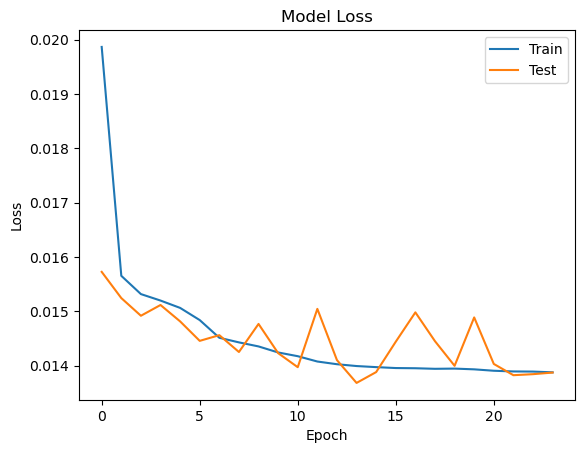

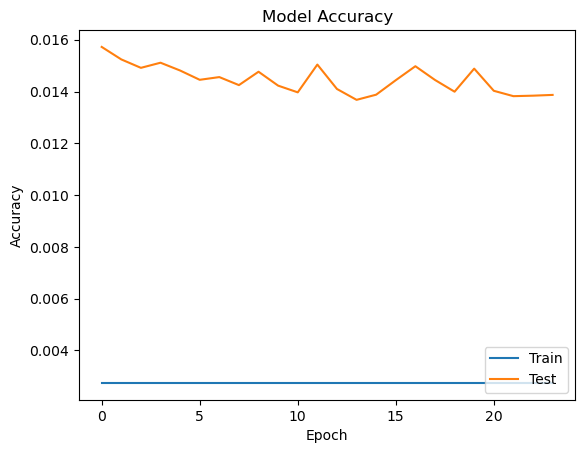

In [31]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.savefig(r"C:\Users\Asus\Desktop\abc1.png", dpi=600)
plt.show()

# Plotting the training and test accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_mae'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig(r"C:\Users\Asus\Desktop\abc2.png", dpi=600)
plt.show()



# Extras

Linear Regression doesnt use learning rate, epochs, or batch size, as it uses the closed-form solution to find the optimal coefficients. These hyperparameters are used in iterative optimization algorithms like gradient descent. However, we can still include batch size in Linear Regression by using a batch-wise gradient descent approach. 

Epoch 1, Train MAE: 0.0307, Train RMSE: 0.0487, Test MAE: 0.0307, Test RMSE: 0.0486
Epoch 2, Train MAE: 0.0307, Train RMSE: 0.0487, Test MAE: 0.0307, Test RMSE: 0.0486
Epoch 3, Train MAE: 0.0307, Train RMSE: 0.0487, Test MAE: 0.0307, Test RMSE: 0.0486
Epoch 4, Train MAE: 0.0307, Train RMSE: 0.0487, Test MAE: 0.0307, Test RMSE: 0.0486
Epoch 5, Train MAE: 0.0307, Train RMSE: 0.0487, Test MAE: 0.0307, Test RMSE: 0.0486
Epoch 6, Train MAE: 0.0307, Train RMSE: 0.0487, Test MAE: 0.0307, Test RMSE: 0.0486
Epoch 7, Train MAE: 0.0307, Train RMSE: 0.0487, Test MAE: 0.0307, Test RMSE: 0.0486
Epoch 8, Train MAE: 0.0307, Train RMSE: 0.0487, Test MAE: 0.0307, Test RMSE: 0.0486
Epoch 9, Train MAE: 0.0307, Train RMSE: 0.0487, Test MAE: 0.0307, Test RMSE: 0.0486
Epoch 10, Train MAE: 0.0307, Train RMSE: 0.0487, Test MAE: 0.0307, Test RMSE: 0.0486
Epoch 11, Train MAE: 0.0307, Train RMSE: 0.0487, Test MAE: 0.0307, Test RMSE: 0.0486
Epoch 12, Train MAE: 0.0307, Train RMSE: 0.0487, Test MAE: 0.0307, Test RM

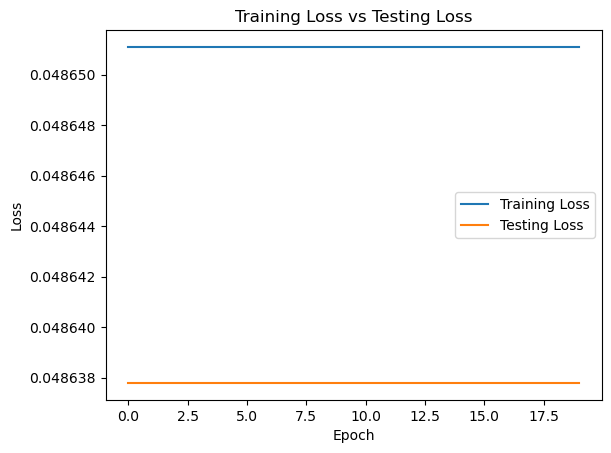

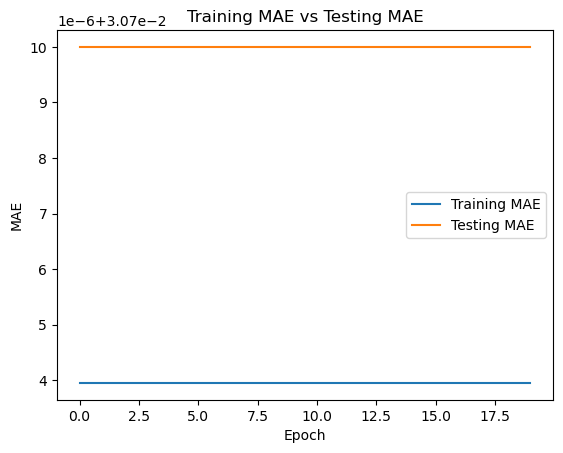

In [9]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


import os
# Folder path containing CSV files
folder_path = r"C:\Users\Asus\Desktop\PG Project\Legend\vehicles\Clg project files\2nd review\Li-ion-SoC-Estimation comparison of all\csv-data"
# Empty list to store data from all CSV files
data_frames = []

# Loop through all CSV files in the folder and append to data_frames list
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        filepath = os.path.join(folder_path, filename)
        df = pd.read_csv(filepath)
        data_frames.append(df)


# Concatenate all data frames into a single data frame
df = pd.concat(data_frames)


max_discharge = abs(min(df["Ah"])) 
df["SoC Capacity"] = max_discharge + df["Ah"]
df["SoC Percentage"] = df["SoC Capacity"] / max(df["SoC Capacity"])


x = df[["Voltage", "Current", "Battery Temp"]].to_numpy()
y = df[["SoC Percentage"]].to_numpy()


# Splitting the dataset into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=500)

# Set batch size
batch_size = 16

# Number of batches
n_batches = int(np.ceil(train_x.shape[0] / batch_size))

# Set number of epochs
n_epochs = 20

# Creating a Linear Regression model
lr_model = LinearRegression()

for epoch in range(n_epochs):
    # Shuffle indices
    indices = np.random.permutation(train_x.shape[0])
    # Split indices into batches
    batch_indices = np.array_split(indices, n_batches)
    
    for batch_index in batch_indices:
        # Get batch data
        batch_x = train_x[batch_index]
        batch_y = train_y[batch_index]
        
        # Fit batch data to the model
        lr_model.fit(batch_x, batch_y)

    # Predicting the target variable for the testing set using the trained Linear Regression model
    predicted_target_lr = lr_model.predict(test_x)

    # Calculating the Mean Absolute Error (MAE) between the predicted and actual target values
    mae = mean_absolute_error(test_y, predicted_target_lr)
    print('Epoch:', epoch+1, 'MAE:', mae*100)

    rmse = np.sqrt(mean_squared_error(test_y, predicted_target_lr))
    print('Epoch:', epoch+1, 'RMSE:', rmse*100)


In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import os
# Folder path containing CSV files
folder_path = r"C:\Users\Asus\Desktop\PG Project\Legend\vehicles\Clg project files\2nd review\Li-ion-SoC-Estimation comparison of all\csv-data"
# Empty list to store data from all CSV files
data_frames = []

# Loop through all CSV files in the folder and append to data_frames list
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        filepath = os.path.join(folder_path, filename)
        df = pd.read_csv(filepath)
        data_frames.append(df)


# Concatenate all data frames into a single data frame
df = pd.concat(data_frames)

max_discharge = abs(min(df["Ah"])) 
df["SoC Capacity"] = max_discharge + df["Ah"]
df["SoC Percentage"] = df["SoC Capacity"] / max(df["SoC Capacity"])

x = df[["Voltage", "Current", "Battery Temp"]].to_numpy()
y = df[["SoC Percentage"]].to_numpy()

# Splitting the dataset into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=500)

# Define the learning rate and number of epochs
learning_rate = 0.001
epochs = 10
batch_size = 16

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Store the MAE and RMSE for each epoch
mae_list = []
rmse_list = []

# Training the model
for epoch in range(epochs):
    # Train the model on the training set for the current epoch
    lr_model.fit(train_x, train_y)
    
    # Predict the target variable for the testing set using the trained Linear Regression model
    predicted_target_lr = lr_model.predict(test_x)
    
    # Calculate the Mean Absolute Error (MAE) and Root Mean Square Error (RMSE) for the current epoch
    mae = mean_absolute_error(test_y, predicted_target_lr)
    rmse = np.sqrt(mean_squared_error(test_y, predicted_target_lr))
    
    # Append the MAE and RMSE for the current epoch to the lists
    mae_list.append(mae)
    rmse_list.append(rmse)
    
    # Print the MAE and RMSE for the current epoch
    print(f"Epoch {epoch+1} - MAE: {mae*100:.2f}, RMSE: {rmse*100:.2f}")

# Plot the MAE and RMSE for each epoch
plt.plot(range(epochs), mae_list, label="MAE")
plt.plot(range(epochs), rmse_list, label="RMSE")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("MAE and RMSE for each Epoch")
plt.legend()
plt.show()
